In [32]:
from itertools import chain

from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import evaluation.evaluator as evaluator
from importlib import reload

reload(evaluator)

<module 'evaluation.evaluator' from '/home/alex/code/ML/ML24/exercise-1/evaluation/evaluator.py'>

In [33]:
path = "./datasets_kaggle/breast-cancer/"
train_data = pd.read_csv("%sbreast-cancer-diagnostic.shuf.lrn.csv" % path)
competition_data = pd.read_csv("%sbreast-cancer-diagnostic.shuf.tes.csv" % path)

train_data.replace(['NONE', '?', '', 'None', b''], pd.NA, inplace=True)
competition_data.replace(['NONE', '?', '', 'None', b''], pd.NA, inplace=True)

train_data.drop(columns=['ID'], inplace=True)
competition_data.drop(columns=['ID'], inplace=True)

In [34]:
train_data

,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,True,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,...,16.39,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.13740,0.3068,0.07957
1,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
2,True,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.4024,0.19660,0.2730,0.08666
3,True,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,0.1807,...,21.84,25.00,140.90,1485.0,0.1434,0.2763,0.3853,0.17760,0.2812,0.08198
4,False,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,...,17.50,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.13740,0.2723,0.07071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,False,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.3779,0.09594,0.2471,0.07463
281,False,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,...,15.15,31.82,99.00,698.8,0.1162,0.1711,0.2282,0.12820,0.2871,0.06917
282,False,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.1916,0.07926,0.2940,0.07587
283,False,13.59,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,0.1635,...,14.80,30.04,97.66,661.5,0.1005,0.1730,0.1453,0.06189,0.2446,0.07024


In [35]:
competition_data

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.1362,0.08178,0.2487,0.06766
1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
2,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,0.1496,0.05674,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.1786,0.09678,0.2506,0.07623
3,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.10990,0.1603,0.06818
4,13.64,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717,0.05660,...,14.85,19.05,94.11,683.4,0.1278,0.1291,0.1533,0.09222,0.2530,0.06510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,12.76,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,0.06183,...,13.75,25.99,87.82,579.7,0.1298,0.1839,0.1255,0.08312,0.2744,0.07238
280,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,0.06582,...,13.06,17.16,82.96,512.5,0.1431,0.1851,0.1922,0.08449,0.2772,0.08756
281,12.87,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,0.05769,...,13.90,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.05780,0.3604,0.07062
282,15.75,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,0.06303,...,19.56,30.29,125.90,1088.0,0.1552,0.4480,0.3976,0.14790,0.3993,0.10640


In [36]:
y = train_data[('class')]
X = train_data.drop('class', axis=1)  # Features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# y_comp = competition_data['grade']  # Target variable does not exist for competition data
X_comp = competition_data
print(X_train.dtypes)

radiusMean                 float64
 textureMean               float64
 perimeterMean             float64
 areaMean                  float64
 smoothnessMean            float64
 compactnessMean           float64
 concavityMean             float64
 concavePointsMean         float64
 symmetryMean              float64
 fractalDimensionMean      float64
 radiusStdErr              float64
 textureStdErr             float64
 perimeterStdErr           float64
 areaStdErr                float64
 smoothnessStdErr          float64
 compactnessStdErr         float64
 concavityStdErr           float64
 concavePointsStdErr       float64
 symmetryStdErr            float64
 fractalDimensionStdErr    float64
 radiusWorst               float64
 textureWorst              float64
 perimeterWorst            float64
 areaWorst                 float64
 smoothnessWorst           float64
 compactnessWorst          float64
 concavityWorst            float64
 concavePointsWorst        float64
 symmetryWorst      

In [37]:
print("null values in train data: " + str(X_train.isnull().sum().sum()))
print("null values in test data: " + str(X_test.isnull().sum().sum()))
print("null values in competition data: " + str(X_comp.isnull().sum().sum()))

null values in train data: 0
null values in test data: 0
null values in competition data: 0


In [38]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    #('scaler', StandardScaler())
])

pipeline_standard = Pipeline([
    ('scaler', StandardScaler())
])

X_train_std = pipeline_standard.fit_transform(X_train)
X_test_std = pipeline_standard.transform(X_test)
X_comp_std = pipeline_standard.transform(X_comp)

# Preprocess training data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
X_comp = pipeline.transform(X_comp)

In [39]:
# Encode target variable
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Evaluation

## Neural network

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'activation': 'relu', 'learning_rate': 'constant', 'max_iter': 2000, 'verbose': False}
done with  hidden_layer_sizes   (10,)  results:  {'accuracy': 0.9699300699300698, 'recall': 0.9699300699300698, 'precision': 0.9706673224207775, 'f1': 0.969719000624444, 'time': 161.3039255142212, 'hidden_layer_sizes': (10,)}
done with  hidden_layer_sizes   (10, 10)  results:  {'accuracy': 0.9748251748251748, 'recall': 0.9748251748251748, 'precision': 0.9750123394872029, 'f1': 0.9747426542323099, 'time': 129.29887771606445, 'hidden_layer_sizes': (10, 10)}
done with  hidden_layer_sizes   (10, 10, 10)  results:  {'accuracy': 0.9664335664335665, 'recall': 0.9664335664335665, 'precision': 0.9664766464101436, 'f1': 0.966373395413037, 'time': 128.0989170074463, 'hidden_layer_sizes': (10, 10, 10)}
done with  hidden_layer_sizes   (10, 10, 10, 10)  results:  {'accuracy': 0.9608391608391609, 'recall': 0.9608391608391609, 'precision': 0.

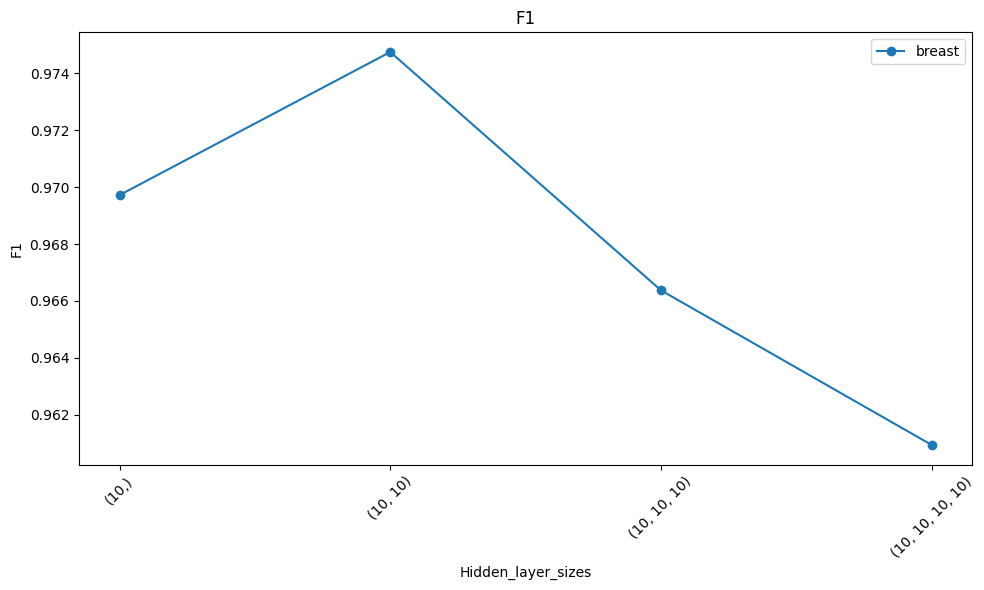

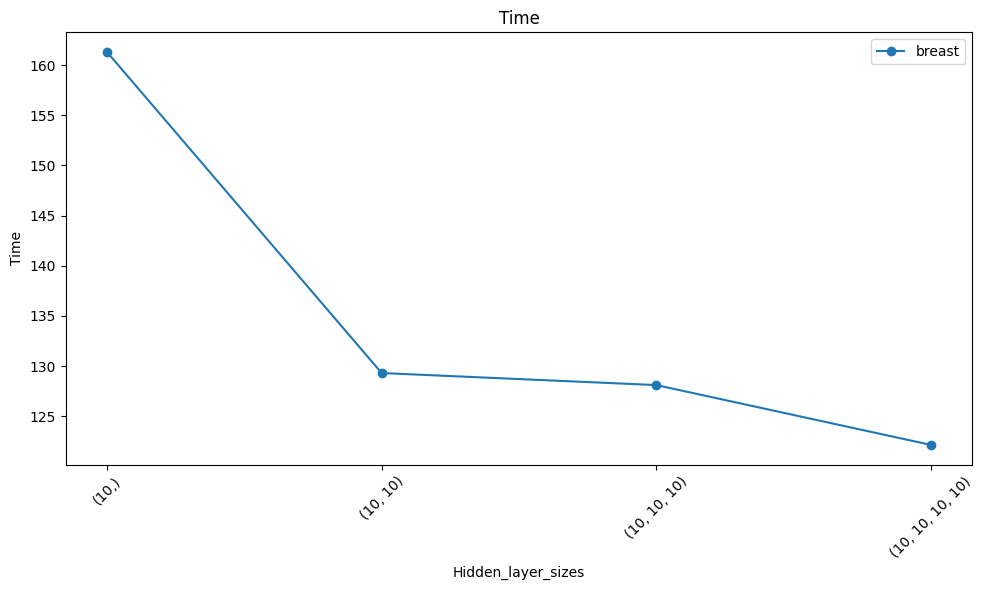

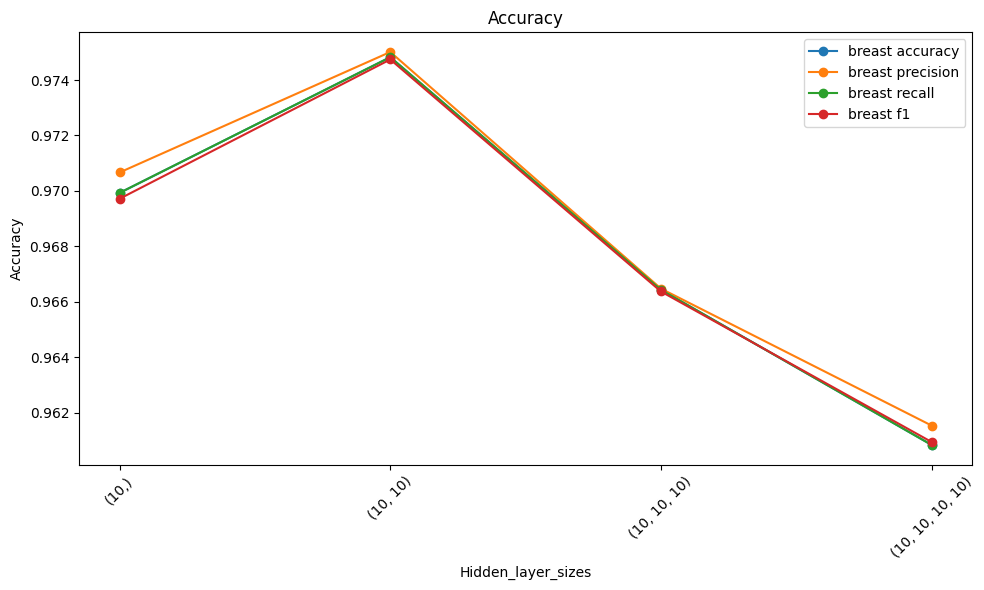

In [40]:
reload(evaluator)
hyperparameters = {
    'solver': 'adam',
    'activation': 'relu',
    'learning_rate': 'constant',
    #'hidden_layer_sizes': (15, 15, 15),
    #'random_state': 7895,
    'max_iter': 2000,
    'verbose': False,
    #'tol': 5e-5
}
hyperparameters_iterator = {'hidden_layer_sizes': [(10,), (10,10), (10,10,10), (10,10,10,10),]}
nn_hidden_layer_deep = evaluator.evaluate2_mean(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator, number_of_tests=10)
evaluator.draw_diagram2_list({"breast": nn_hidden_layer_deep}, x_axis='hidden_layer_sizes', y_axis=['f1', 'time'], logaritmic=False)
evaluator.draw_diagram2_list_all_in_one({"breast": nn_hidden_layer_deep}, x_axis='hidden_layer_sizes', y_axis=['accuracy', 'precision', 'recall', 'f1'], logaritmic=False)

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'activation': 'relu', 'learning_rate': 'constant', 'max_iter': 1500, 'verbose': False}
done with  hidden_layer_sizes   (1, 1)  results:  {'accuracy': 0.8265734265734267, 'recall': 0.8265734265734265, 'precision': 0.7347933534996473, 'f1': 0.7688421876848899, 'time': 178.43589782714844, 'hidden_layer_sizes': (1, 1)}
done with  hidden_layer_sizes   (2, 2)  results:  {'accuracy': 0.8391608391608392, 'recall': 0.8391608391608392, 'precision': 0.7460737091839398, 'f1': 0.7818286413251883, 'time': 119.2575454711914, 'hidden_layer_sizes': (2, 2)}
done with  hidden_layer_sizes   (3, 3)  results:  {'accuracy': 0.9734265734265735, 'recall': 0.9734265734265735, 'precision': 0.9741991032419615, 'f1': 0.9732169291556915, 'time': 177.96916961669922, 'hidden_layer_sizes': (3, 3)}
done with  hidden_layer_sizes   (4, 4)  results:  {'accuracy': 0.958041958041958, 'recall': 0.958041958041958, 'precision': 0.9590112372406644, 'f1':

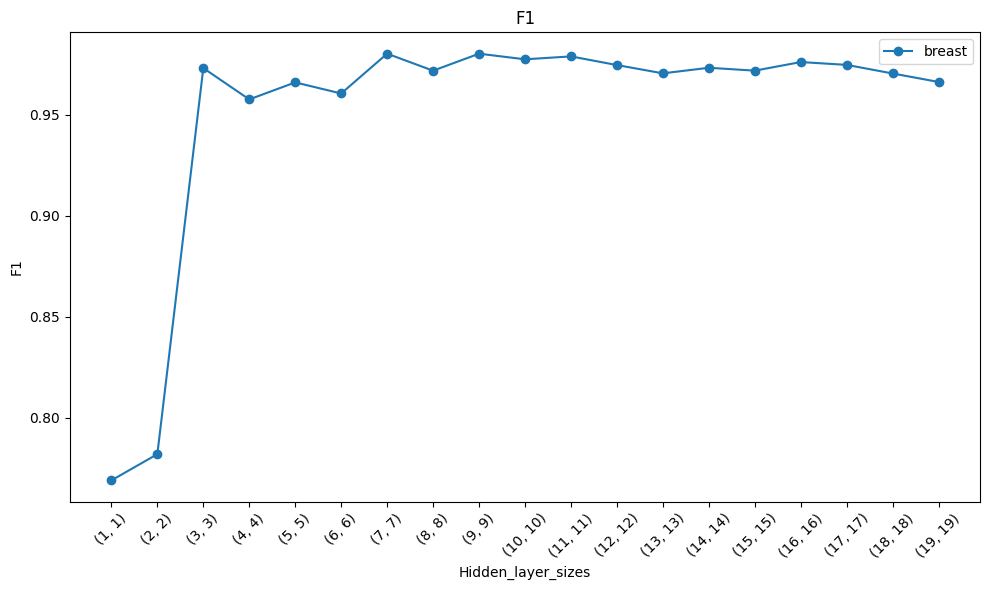

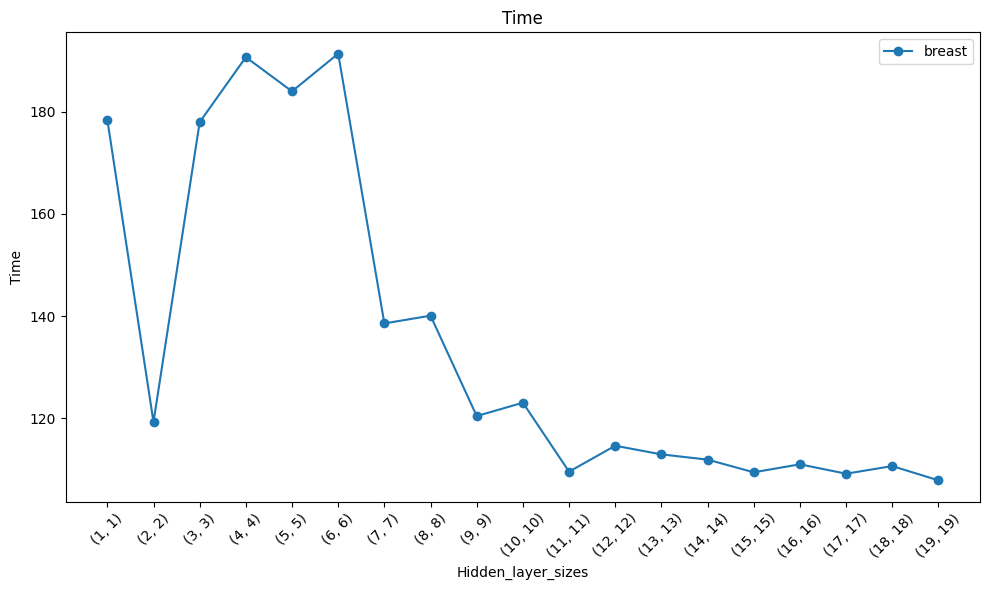

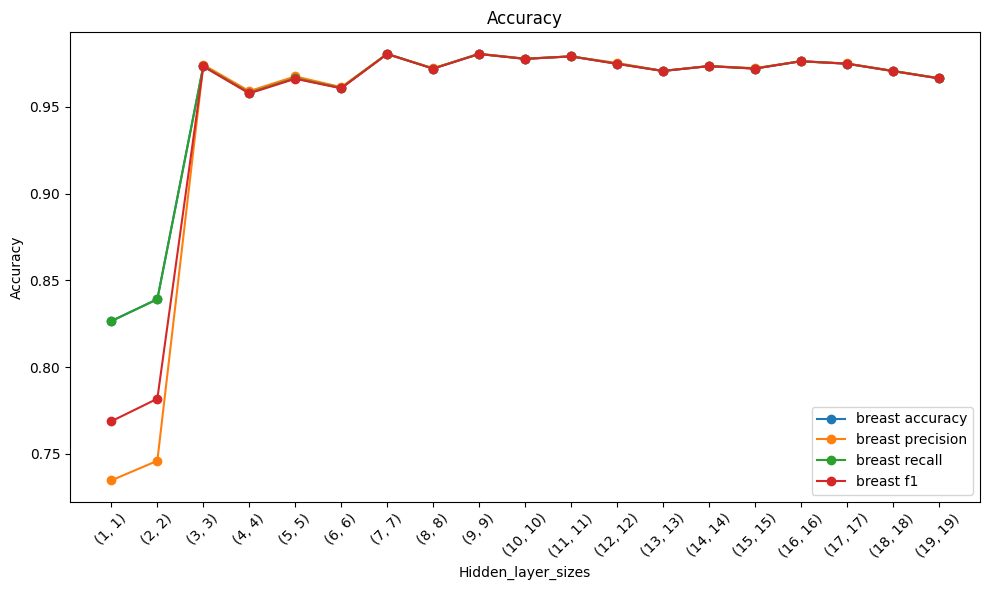

In [41]:
reload(evaluator)
hyperparameters = {
    'solver': 'adam',
    'activation': 'relu',
    'learning_rate': 'constant',
    #'hidden_layer_sizes': (15, 15, 15),
    #'random_state': 7895,
    'max_iter': 1500,
    'verbose': False,
    #'tol': 5e-5
}
hyperparameters_iterator = {'hidden_layer_sizes': [(i, i) for i in range(1, 20, 1)]}
nn_hidden_layer = evaluator.evaluate2_mean(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator, number_of_tests=5)
evaluator.draw_diagram2_list({"breast": nn_hidden_layer}, x_axis='hidden_layer_sizes', y_axis=['f1', 'time'], logaritmic=False)
evaluator.draw_diagram2_list_all_in_one({"breast": nn_hidden_layer}, x_axis='hidden_layer_sizes', y_axis=['accuracy', 'precision', 'recall', 'f1'], logaritmic=False)

In [42]:
np.logspace(-7, -2, num=50)

array([1.00000000e-07, 1.26485522e-07, 1.59985872e-07, 2.02358965e-07,
       2.55954792e-07, 3.23745754e-07, 4.09491506e-07, 5.17947468e-07,
       6.55128557e-07, 8.28642773e-07, 1.04811313e-06, 1.32571137e-06,
       1.67683294e-06, 2.12095089e-06, 2.68269580e-06, 3.39322177e-06,
       4.29193426e-06, 5.42867544e-06, 6.86648845e-06, 8.68511374e-06,
       1.09854114e-05, 1.38949549e-05, 1.75751062e-05, 2.22299648e-05,
       2.81176870e-05, 3.55648031e-05, 4.49843267e-05, 5.68986603e-05,
       7.19685673e-05, 9.10298178e-05, 1.15139540e-04, 1.45634848e-04,
       1.84206997e-04, 2.32995181e-04, 2.94705170e-04, 3.72759372e-04,
       4.71486636e-04, 5.96362332e-04, 7.54312006e-04, 9.54095476e-04,
       1.20679264e-03, 1.52641797e-03, 1.93069773e-03, 2.44205309e-03,
       3.08884360e-03, 3.90693994e-03, 4.94171336e-03, 6.25055193e-03,
       7.90604321e-03, 1.00000000e-02])

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'activation': 'relu', 'learning_rate': 'constant', 'hidden_layer_sizes': (10,), 'max_iter': 800, 'verbose': False}
done with  learning_rate_init   1e-06  results:  {'accuracy': 0.5034965034965035, 'recall': 0.5034965034965035, 'precision': 0.3558052076002658, 'f1': 0.37823245447855564, 'time': 2.7046680450439453, 'learning_rate_init': 1e-06}
done with  learning_rate_init   1.4030037231905748e-06  results:  {'accuracy': 0.37622377622377623, 'recall': 0.37622377622377623, 'precision': 0.23017172617592196, 'f1': 0.25164732286385094, 'time': 2.443218231201172, 'learning_rate_init': 1.4030037231905748e-06}
done with  learning_rate_init   1.9684194472866114e-06  results:  {'accuracy': 0.5412587412587413, 'recall': 0.5412587412587412, 'precision': 0.4845594191059578, 'f1': 0.4202946992567099, 'time': 2.4445056915283203, 'learning_rate_init': 1.9684194472866114e-06}
done with  learning_rate_init   2.761699813343849e-06 

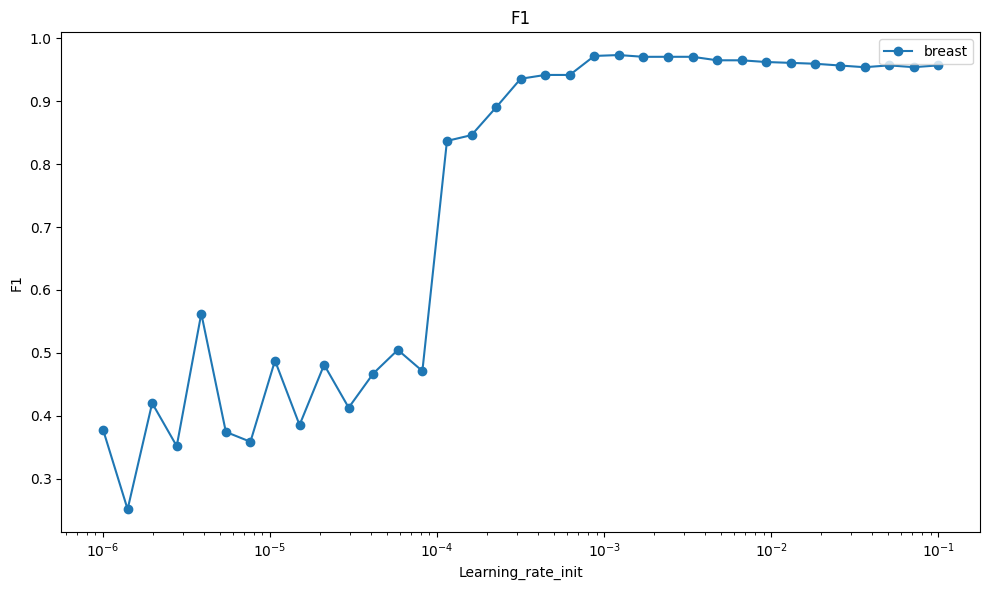

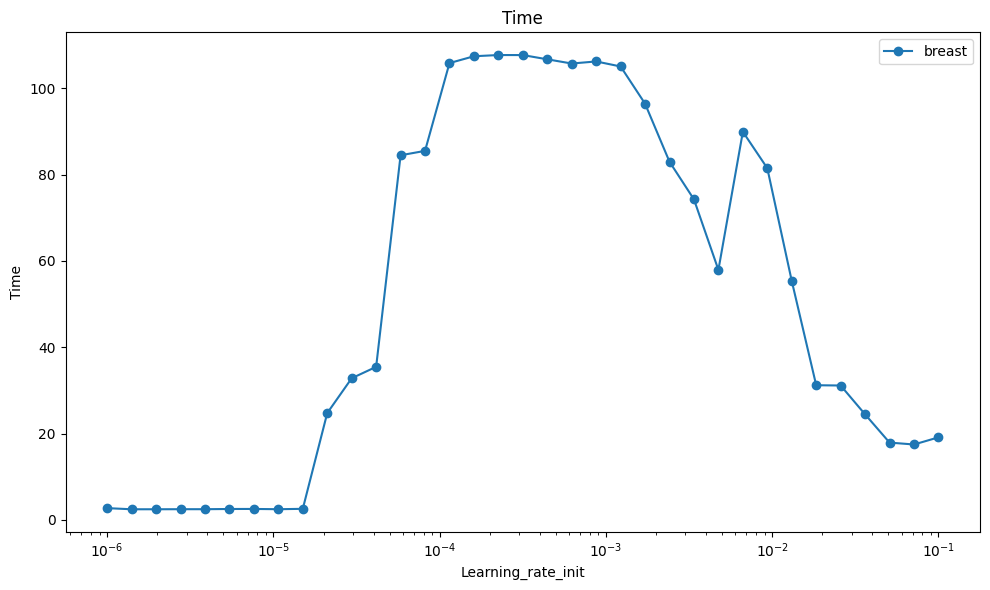

In [43]:
reload(evaluator)
hyperparameters = {
    'solver': 'adam',
    'activation': 'relu',
    'learning_rate': 'constant',
    'hidden_layer_sizes': (10,),
    #'random_state': 7895,
    'max_iter': 800,
    'verbose': False,
    #'tol': 5e-5
}
hyperparameters_iterator = {'learning_rate_init': np.logspace(-6, -1, num=35)}
nn_learning_rate = evaluator.evaluate2_mean(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator, number_of_tests=5)
evaluator.draw_diagram2_list({"breast": nn_learning_rate}, x_axis='learning_rate_init', y_axis=['f1', 'time'], logaritmic=True)

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'activation': 'relu', 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (10,), 'verbose': False}
done with  max_iter   50  results:  {'accuracy': 0.676923076923077, 'recall': 0.676923076923077, 'precision': 0.7376558452336986, 'f1': 0.6423466951340421, 'time': 7.7880859375, 'max_iter': 50}
done with  max_iter   75  results:  {'accuracy': 0.6937062937062937, 'recall': 0.6937062937062938, 'precision': 0.7217277186343456, 'f1': 0.6798837521447367, 'time': 10.943412780761719, 'max_iter': 75}
done with  max_iter   100  results:  {'accuracy': 0.8713286713286713, 'recall': 0.8713286713286713, 'precision': 0.8913867088250165, 'f1': 0.8645668732820992, 'time': 14.296531677246094, 'max_iter': 100}
done with  max_iter   125  results:  {'accuracy': 0.8573426573426574, 'recall': 0.8573426573426574, 'precision': 0.8662472567315301, 'f1': 0.8522508489325842, 'time': 17.699527740478516, 'max_iter':

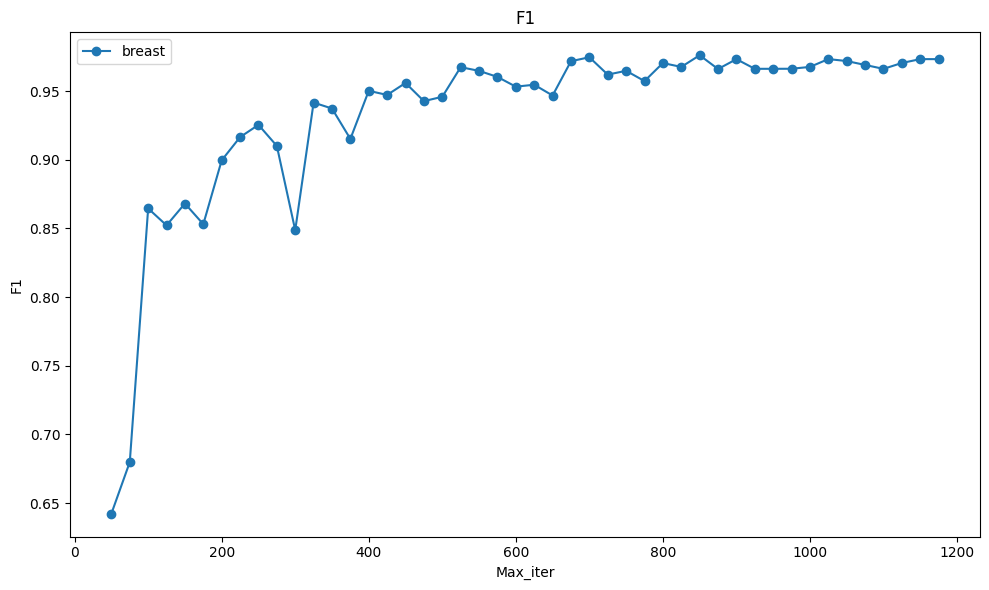

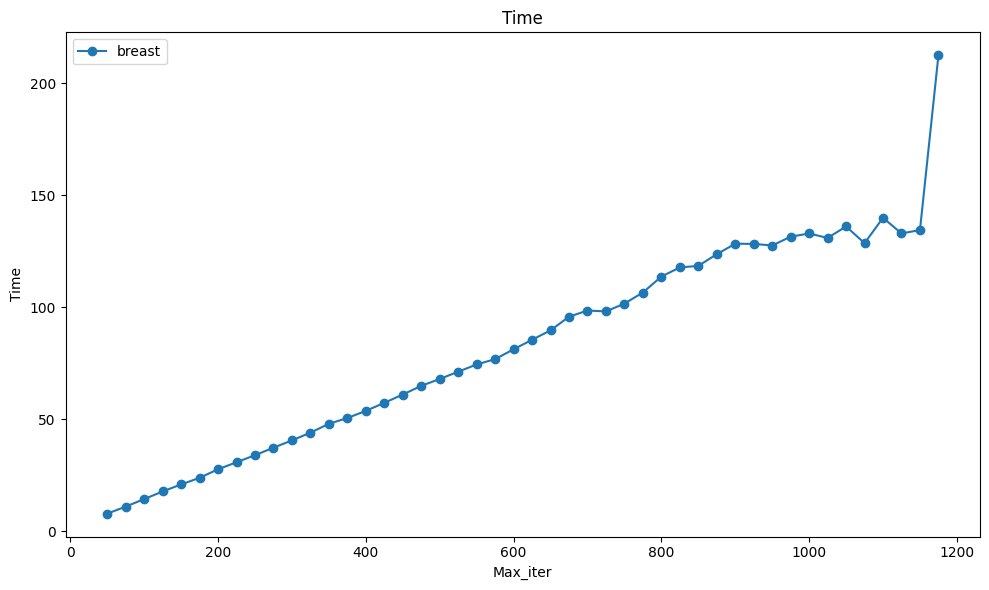

In [44]:
reload(evaluator)
hyperparameters = {
    'solver': 'adam',
    'activation': 'relu',
    'learning_rate': 'constant',
    'learning_rate_init': 1e-3,
    'hidden_layer_sizes': (10,),
    #'random_state': 7895,
    #'max_iter': 800,
    'verbose': False,
    #'tol': 5e-5
}
hyperparameters_iterator = {'max_iter': range(50, 1200, 25)}
nn_max_iter = evaluator.evaluate2_mean(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator, number_of_tests=5, hide_warnings=True)
evaluator.draw_diagram2_list({"breast": nn_max_iter}, x_axis='max_iter', y_axis=['f1', 'time'], logaritmic=False)

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (10,), 'max_iter': 3000, 'verbose': False}
done with  activation   identity  results:  {'accuracy': 0.9695804195804195, 'recall': 0.9695804195804195, 'precision': 0.9699775873041773, 'f1': 0.9694234360222792, 'time': 121.39912843704224, 'activation': 'identity'}
done with  activation   logistic  results:  {'accuracy': 0.9723776223776224, 'recall': 0.9723776223776222, 'precision': 0.9729592784608592, 'f1': 0.9722118758441877, 'time': 198.33964109420776, 'activation': 'logistic'}
done with  activation   tanh  results:  {'accuracy': 0.9751748251748251, 'recall': 0.975174825174825, 'precision': 0.9754188935520632, 'f1': 0.9750662433841495, 'time': 131.16016387939453, 'activation': 'tanh'}
done with  activation   relu  results:  {'accuracy': 0.9713286713286713, 'recall': 0.9713286713286713, 'precision': 0.9717957790749848, 'f1': 0.9711672

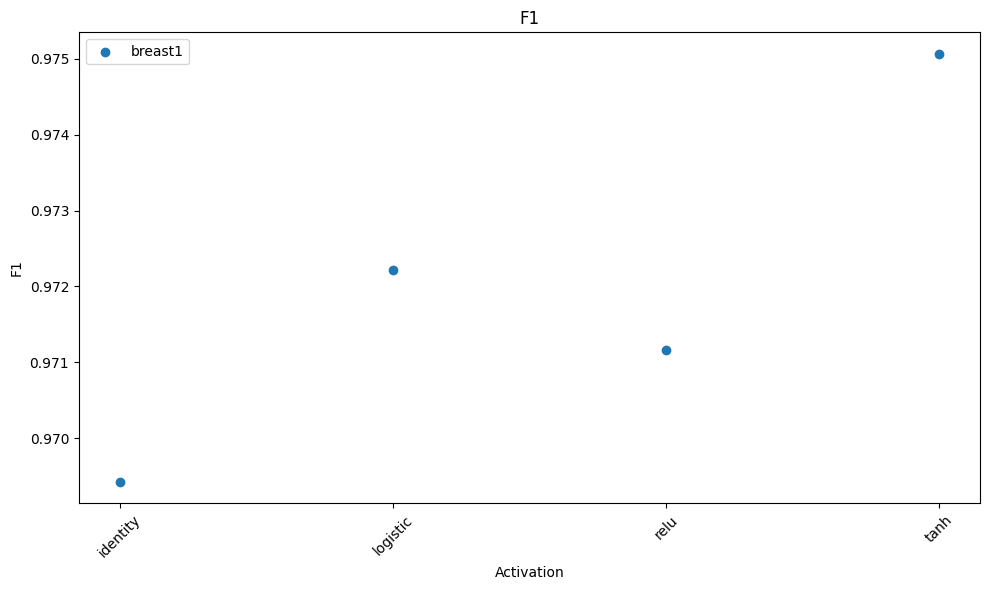

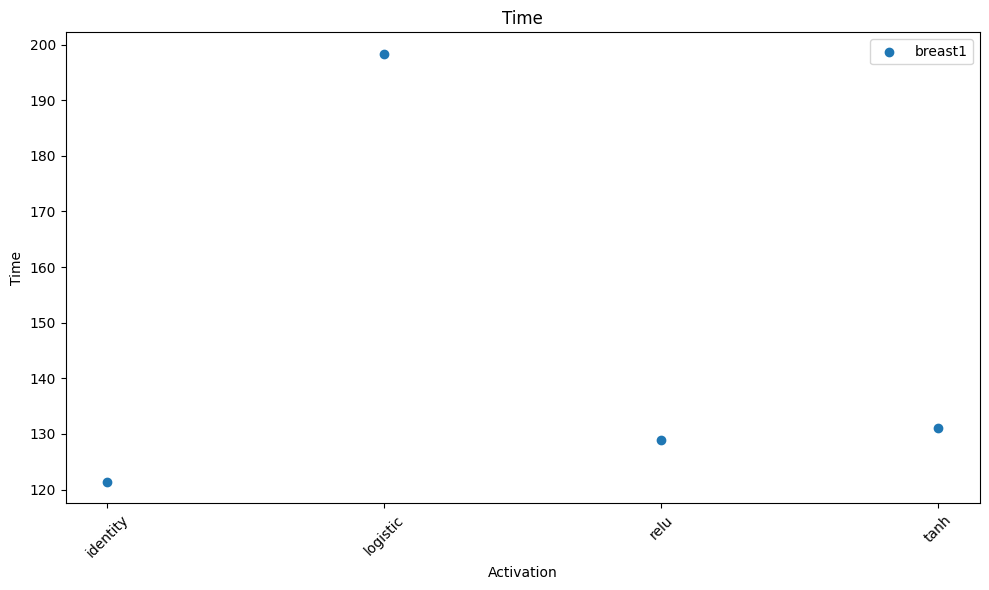

In [45]:
reload(evaluator)
hyperparameters = {
    'solver': 'adam',
    #'activation': 'relu',
    'learning_rate': 'constant',
    'learning_rate_init': 1e-3,
    'hidden_layer_sizes': (10,),
    #'random_state': 7895,
    'max_iter': 3000,
    'verbose': False,
    #'tol': 5e-5
}
hyperparameters_iterator = {'activation': ['identity', 'logistic', 'tanh', 'relu']}
act_function1 = evaluator.evaluate2_mean(MLPClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator, number_of_tests=20)

evaluator.draw_diagram2_list({"breast1": act_function1,}, x_axis='activation', y_axis=['f1', 'time'], logaritmic=False, line=False)

# Random forrest

Evaluating classifier:  RandomForestClassifier
Hyperparameters:  {'criterion': 'gini', 'verbose': False}
done with  n_estimators   1  results:  {'accuracy': 0.8993006993006993, 'recall': 0.8993006993006993, 'precision': 0.8998603085288515, 'f1': 0.8984399434273662, 'time': 1.8321990966796875, 'n_estimators': 1}
done with  n_estimators   2  results:  {'accuracy': 0.8881118881118881, 'recall': 0.8881118881118881, 'precision': 0.9017735046958716, 'f1': 0.8822743647700884, 'time': 2.4312973022460938, 'n_estimators': 2}
done with  n_estimators   3  results:  {'accuracy': 0.9566433566433566, 'recall': 0.9566433566433566, 'precision': 0.9570100749969314, 'f1': 0.9564705110804267, 'time': 4.047679901123047, 'n_estimators': 3}
done with  n_estimators   4  results:  {'accuracy': 0.9412587412587413, 'recall': 0.9412587412587412, 'precision': 0.9447790504038227, 'f1': 0.9402188791273811, 'time': 4.551124572753906, 'n_estimators': 4}
done with  n_estimators   5  results:  {'accuracy': 0.96363636363

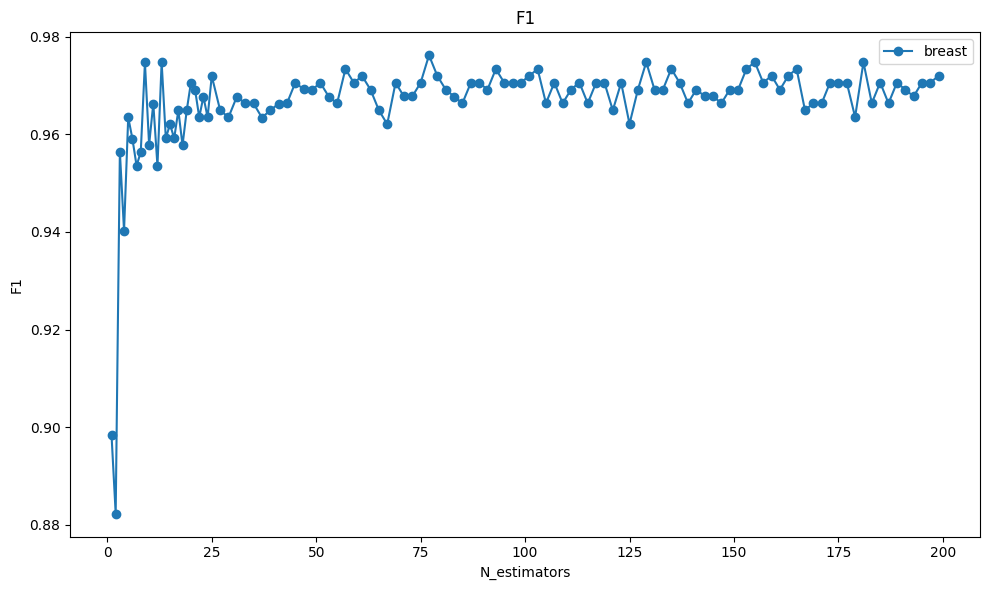

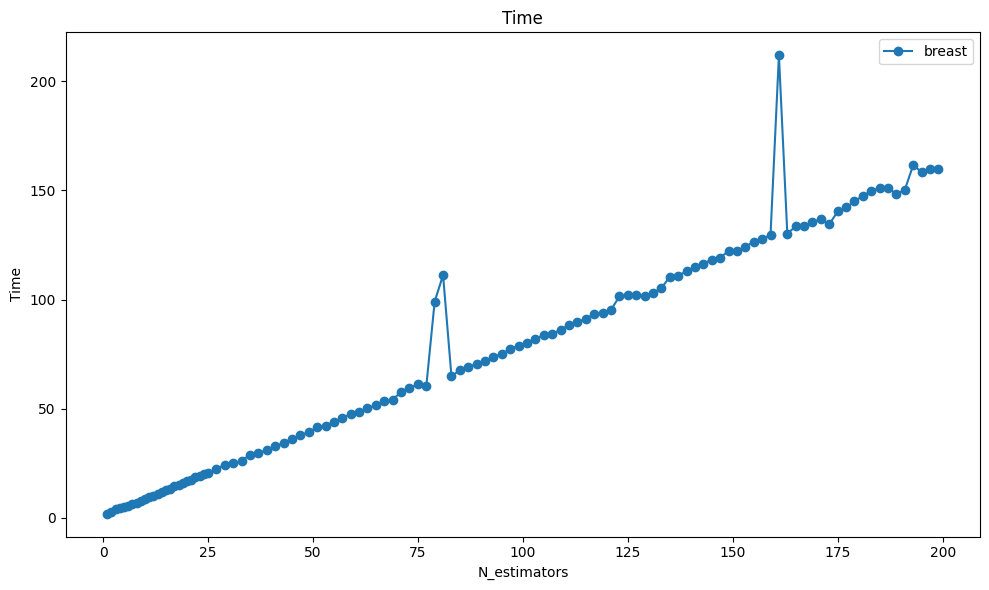

In [46]:
hyperparameters = {
    #'n_estimators': 100,
    'criterion': 'gini', # entropy, log_loss
    'verbose': False,
}
hyperparameters_iterator = {'n_estimators': chain(range(1, 25, 1), range(25, 200, 2))}
rf_n_estimators = evaluator.evaluate2_mean(RandomForestClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator, number_of_tests=5)
evaluator.draw_diagram2_list({"breast": rf_n_estimators}, x_axis='n_estimators', y_axis=['f1', 'time'], logaritmic=False)

Evaluating classifier:  RandomForestClassifier
Hyperparameters:  {'n_estimators': 5, 'verbose': False}
done with  criterion   gini  results:  {'accuracy': 0.9567832167832168, 'recall': 0.9567832167832165, 'precision': 0.9571903512659307, 'f1': 0.9565593528701244, 'time': 4.637339115142822, 'criterion': 'gini'}
done with  criterion   entropy  results:  {'accuracy': 0.9567832167832168, 'recall': 0.9567832167832171, 'precision': 0.9570760138721154, 'f1': 0.9565895503150352, 'time': 4.587955474853516, 'criterion': 'entropy'}
done with  criterion   log_loss  results:  {'accuracy': 0.9573426573426573, 'recall': 0.9573426573426574, 'precision': 0.957684703059072, 'f1': 0.9571538043945668, 'time': 4.572551250457764, 'criterion': 'log_loss'}


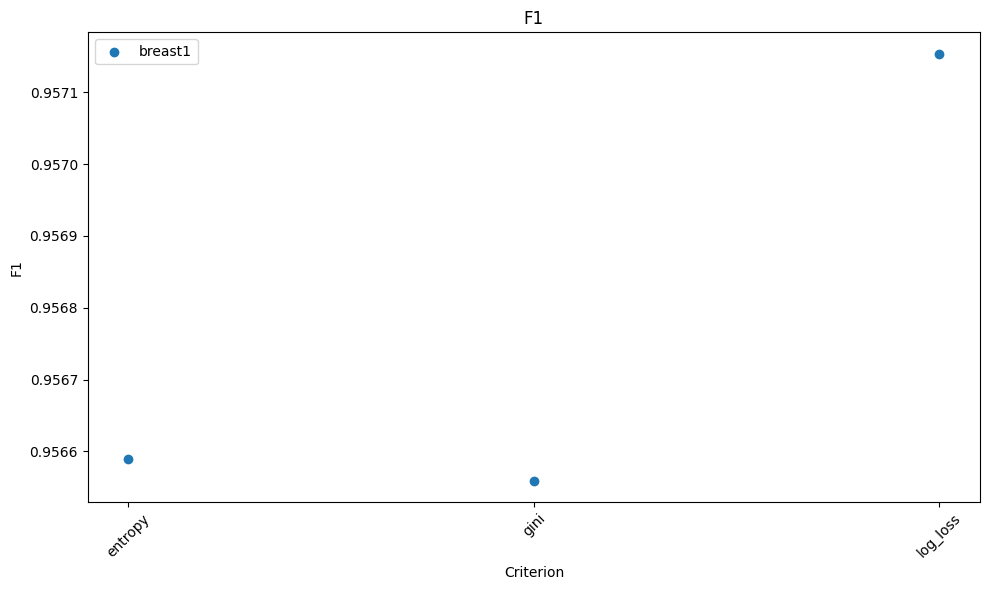

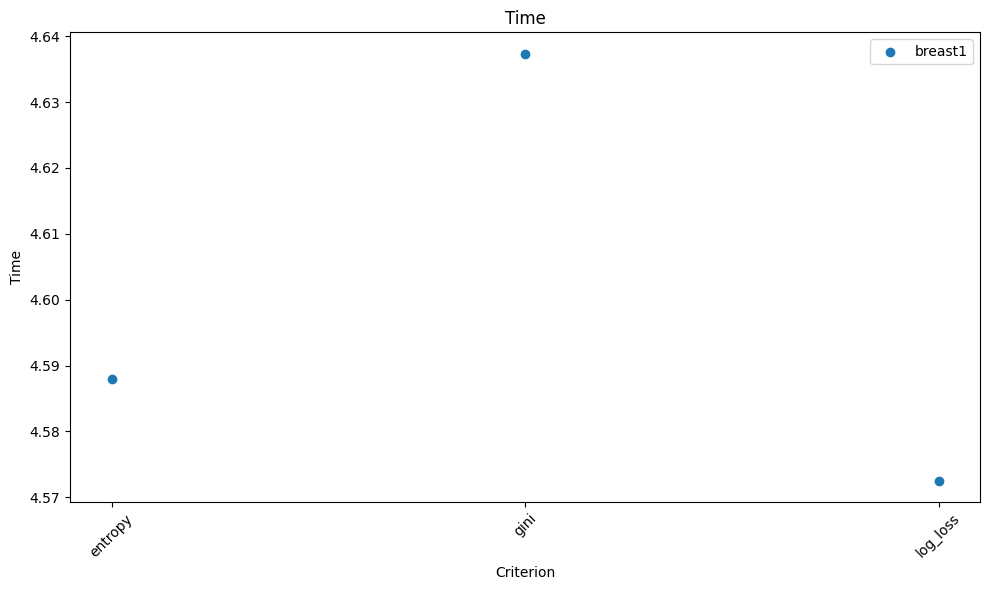

In [47]:
reload(evaluator)
hyperparameters = {
    'n_estimators': 5,
    #'criterion': 'gini', # entropy, log_loss
    'verbose': False,
}
hyperparameters_iterator = {'criterion': ['gini', 'entropy', 'log_loss']}
rf_criterion = evaluator.evaluate2_mean(RandomForestClassifier, X_train, y_train, X_test, y_test, hyperparameters=hyperparameters,
                           hyperparameters_iterate=hyperparameters_iterator, number_of_tests=100)

evaluator.draw_diagram2_list({"breast1": rf_criterion,}, x_axis='criterion', y_axis=['f1', 'time'], logaritmic=False, line=False)

# Bayesian

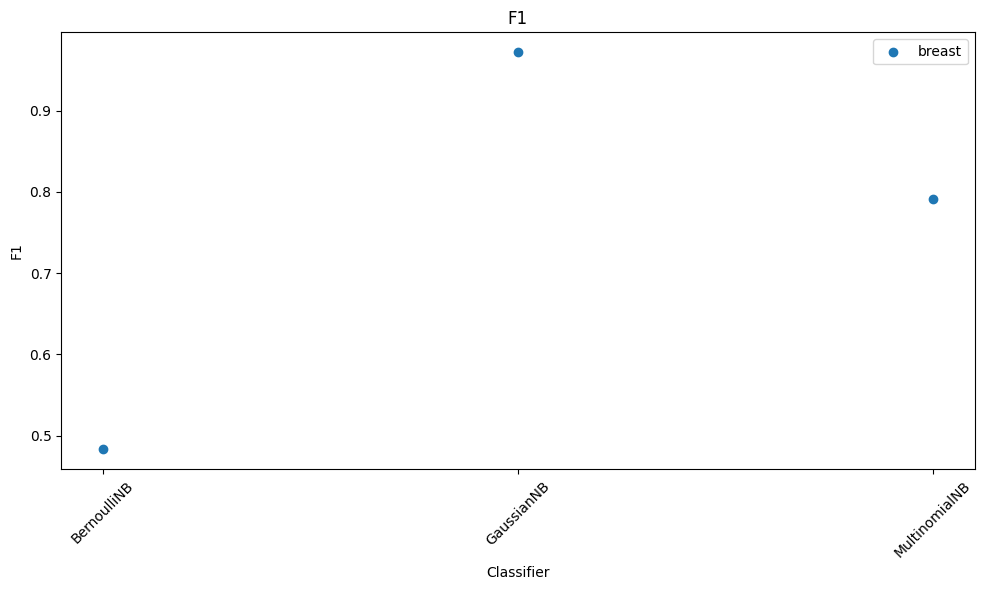

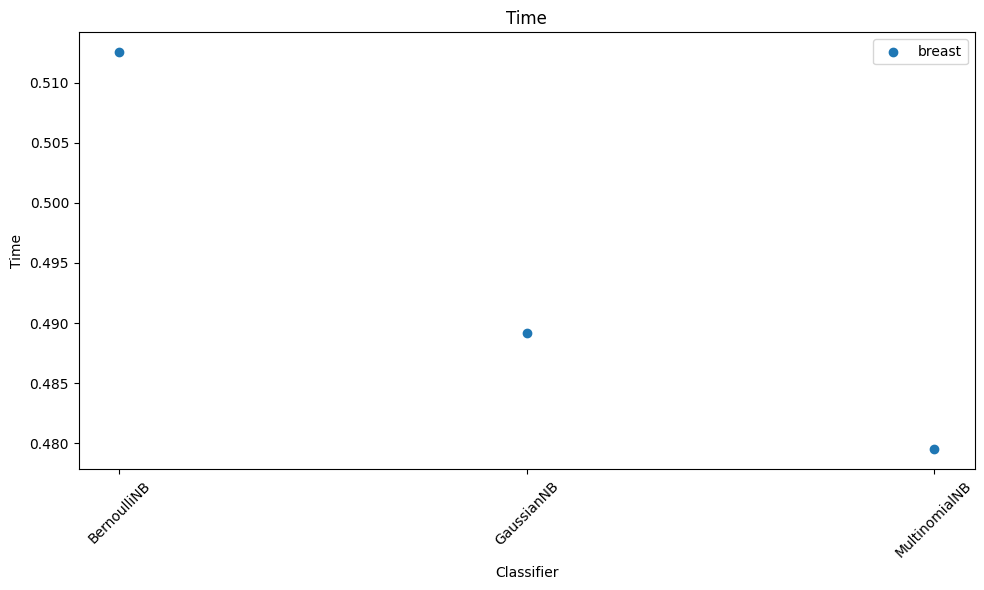

In [48]:
reload(evaluator)

classifiers = [GaussianNB, MultinomialNB, BernoulliNB]
names = ['GaussianNB', 'MultinomialNB', 'BernoulliNB']

bayes_results=evaluator.evaluate_classifier(classifiers, X_train, y_train, X_test, y_test, hyperparameters=[{},{},{},], names=names, number_of_tests=20)
evaluator.draw_diagram2_list({"breast": bayes_results}, x_axis='classifier', y_axis=['f1', 'time'], logaritmic=False, line=False)

# evaluate scalers

Evaluating classifier:  MLPClassifier
Hyperparameters:  {'solver': 'adam', 'activation': 'relu', 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (10, 10), 'max_iter': 2500, 'verbose': False}


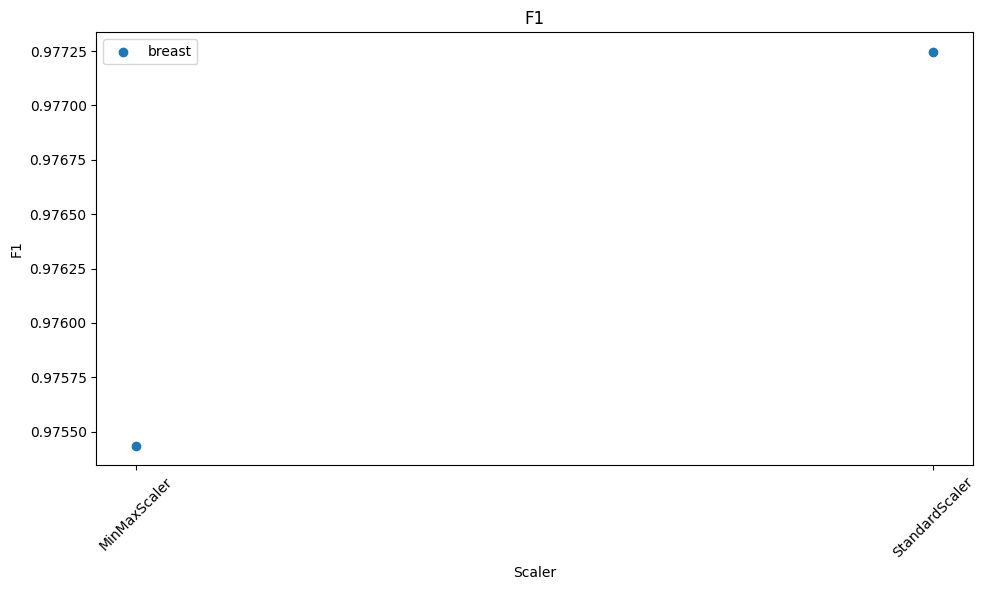

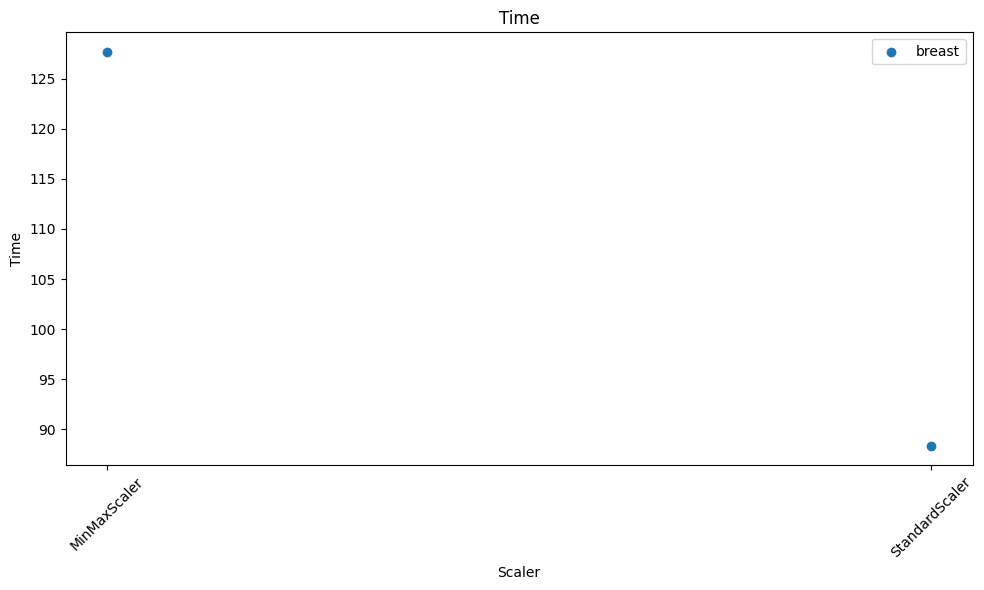

In [49]:
reload(evaluator)
hyperparameters = {
    'solver': 'adam',
    'activation': 'relu',
    'learning_rate': 'constant',
    'learning_rate_init': 1e-3,
    'hidden_layer_sizes': (10, 10),
    #'random_state': 7895,
    'max_iter': 2500,
    'verbose': False,
    #'tol': 5e-5
}

scaler_result=evaluator.evaluate_scaler(MLPClassifier, X_train=[X_train, X_train_std], y_train=[y_train, y_train], X_test=[X_test, X_test_std], y_test=[y_test, y_test], hyperparameters=hyperparameters, names=['MinMaxScaler', 'StandardScaler'], number_of_tests=50)
evaluator.draw_diagram2_list({"breast": scaler_result}, x_axis='scaler', y_axis=['f1', 'time'], logaritmic=False, line=False)

In [50]:
combined_results_breast = {
    # NN
    'nn_learning_rate': nn_learning_rate,
    'nn_max_iter': nn_max_iter,
    'nn_hidden_layer': nn_hidden_layer,
    'nn_hidden_layer_deep': nn_hidden_layer_deep,
    'act_function': act_function1,
    # RF
    'rf_n_estimators': rf_n_estimators,
    'rf_criterion': rf_criterion,
    # Bayes
    'bayes_results': bayes_results,
    'scaler_result': scaler_result
}
import pickle
with open('breast_results.pkl', 'wb') as f:
    pickle.dump(combined_results_breast, f)